# 230968126 Week3 Exercise 2

Name :- Kewal Thacker, Section A, Batch 1

EXERCISE 2: Descriptive Analytics and Visualization 
The data file bollywood.csv contains box office collection and social media promotion 
information about movies released in 2013−2015 period

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

bollywood = pd.read_csv("D:\\230968126\\Week3\\week_3\\bollywood.csv")
df = pd.DataFrame(bollywood)
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


1. How many records are present in the dataset?

In [7]:
count = len(df)
print("Number of records present in the dataset is: ",count)

Number of records present in the dataset is:  149


2. How many movies got released in each genre? Sort number of releases in each genre 
in descending order.

In [10]:
genre_counts = df["Genre"].value_counts()
print("Movies released by genre are as follows: \n",genre_counts)

Movies released by genre are as follows: 
 Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64


3. Which genre had highest number of releases? 

In [15]:
top_genre = genre_counts.idxmax()
print(top_genre,"had the highest number of releases.")

Comedy had the highest number of releases.


4. How many movies in each genre got released in different release times like long 
weekend, festive season, etc. (Note: Do a cross tabulation between Genre and 
ReleaseTime.)

In [82]:
crosstab = pd.crosstab(df["Genre"],df["ReleaseTime"])
print("Movies released during special release times by genre: ")
crosstab.iloc[:,0:3]

Movies released during special release times by genre: 


ReleaseTime,FS,HS,LW
Genre,,,
Drama,4,6,1
Action,3,3,3
Action,0,0,0
Comedy,3,5,5
Romance,3,3,4
Thriller,4,1,1
Thriller,0,0,1


5. Which month of the year, maximum number movie releases are seen? (Note: Extract a 
new column called month from ReleaseDate column.) 

In [28]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df["Month"] = df["Release Date"].dt.month
month_counts = df['Month'].value_counts()
top_month = month_counts.idxmax()
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
print("The month in which most movie releases are seen is:",month_names.get(top_month))

The month in which most movie releases are seen is: January


6. Which month of the year typically sees most releases of high budgeted movies, that is, 
movies with budget of 25 crore or more? 

In [30]:
high_budget_movies = df[df["Budget"]>=25]
month_counts2 = high_budget_movies["Month"].value_counts()
top_month2 = month_counts2.idxmax()
print("The month in which most high budget movies are released is:",month_names.get(top_month2))

The month in which most high budget movies are released is: February


7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate 
return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget. 

In [35]:
df["ROI"] = (df["BoxOfficeCollection"] - df["Budget"])/df["Budget"]
top_10_movies = df.nlargest(10, "ROI")["MovieName"]
print("Top 10 movies in terms of ROI are as follows: \n",top_10_movies)


Top 10 movies in terms of ROI are as follows: 
 64                    Aashiqui 2
89                            PK
132                  Grand Masti
135                 The Lunchbox
87                        Fukrey
58                      Mary Kom
128                       Shahid
37     Humpty Sharma Ki Dulhania
101           Bhaag Milkha Bhaag
115              Chennai Express
Name: MovieName, dtype: object


8. Do the movies have higher ROI if they get released on festive seasons or long 
weekend? Calculate the average ROI for different release times.

In [38]:
average_ROI = df.groupby("ReleaseTime")["ROI"].mean()
print("Average ROI for movies released during Festive Season is: ",average_ROI[0])
print("Average ROI for movies released during Holiday Season is: ",average_ROI[1])
print("Average ROI for movies released during Long Weekends is: ",average_ROI[2])
print("Average ROI for movies released during normal times is: ",average_ROI[3])

Average ROI for movies released during Festive Season is:  0.9738532013595953
Average ROI for movies released during Holiday Season is:  0.8508667840873723
Average ROI for movies released during Long Weekends is:  1.1272053098737975
Average ROI for movies released during normal times is:  0.6577216305350877


Hence movies have higher ROIs if they are released on long weekends or during festive seasons.

9. Is there a correlation between box office collection and YouTube likes? Is the 
correlation positive or negative? 

In [40]:
correlation = df["BoxOfficeCollection"].corr(df["YoutubeLikes"])
if correlation>0:
    print("Yes, there is a positive correlation between Box Office collection and YouTube Likes.")
elif correlation>0:
    print("Yes, there is a negative correlation between Box Office collection and YouTube Likes.")
else:
    print("There is no correlation between Box Office collection and YouTube Likes.")
correlation

Yes, there is a positive correlation between Box Office collection and YouTube Likes.


0.6825165877731297

10. Which genre of movies typically sees more YouTube likes? Draw boxplots for each 
genre of movies to compare.

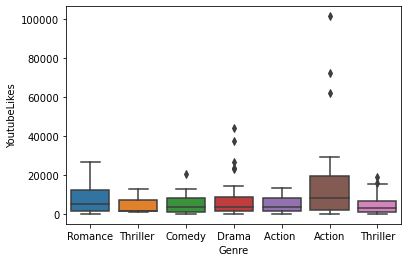

In [42]:
sns.boxplot(x=df["Genre"], y=df["YoutubeLikes"])
plt.show()

Hence action movies typically see more YouTube likes.

11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, 
YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or 
heatmap.

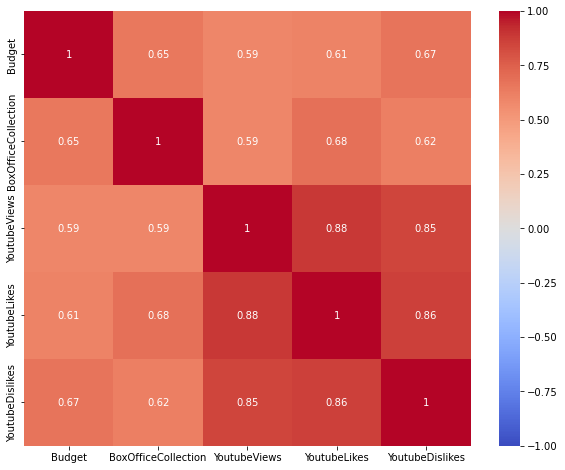

In [89]:
correlation = df[["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,vmin=-1,vmax=1,cmap = "coolwarm",annot=True)
plt.show()

12. During 2013−2015 period, highlight the genre of movies and their box office 
collection? Visualize with best fit graph.

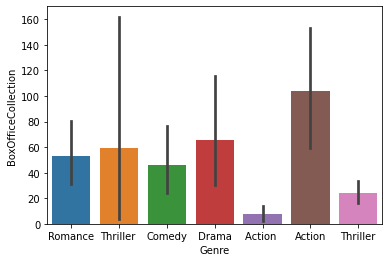

In [52]:
sns.barplot(x="Genre",y="BoxOfficeCollection",data=df)
plt.show()

13. Visualize the Budget and Box office collection based on Genre.

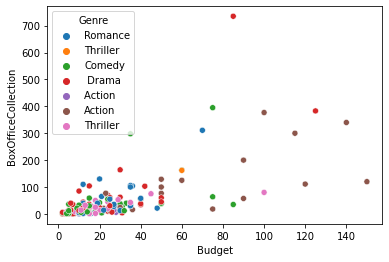

In [55]:
sns.scatterplot(x="Budget",y="BoxOfficeCollection",hue="Genre",data=df)
plt.show()

14. Find the distribution of movie budget for every Genre. 

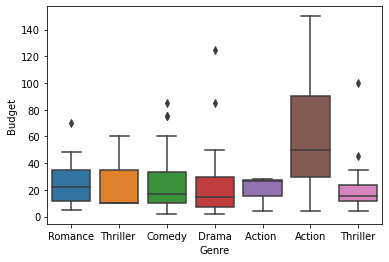

In [56]:
sns.boxplot(x="Genre",y="Budget",data=df)
plt.show()

15. During 2013−2015, find the number of movies released in every year. Also, visualize 
with best fit graph

In [74]:
df_filtered = df[df['Release Date'].dt.year.between(2013, 2015)]
movie_counts = df_filtered['Release Date'].dt.year.value_counts().sort_index()
movie_counts_df = movie_counts.reset_index()
movie_counts_df.columns = ['Year', 'Number of Movies']
movie_counts

2013    67
2014    70
2015    12
Name: Release Date, dtype: int64

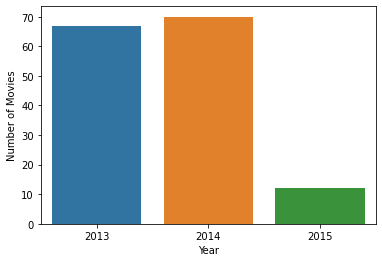

In [76]:
sns.barplot(x = "Year", y = "Number of Movies", data = movie_counts_df)
plt.show()